<a href="https://colab.research.google.com/github/chittatosh3103/Star-type-Prediction/blob/main/Data_Analytics_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA ANALYTICS Mini Project

Write an application demonstrating your skills in defining a data science problem, writing down the requirements carefully, designing a modular solution with clear separation of data preprocessing and transformation, visualization, model building and model evaluation.

# STAR TYPE PREDICTION

Stars follow a certain graph in Celestial Space, called the Hertzsprung-Russell Diagram or simply HR-Diagram. The Data set used obeys to a certain extent this graph. Hence, we can train a machine learning model to predict star type based on the following inputs:

- Absolute Temperature (in K)
- Relative Luminosity (L/Lo)
- Relative Radius (R/Ro)
- Absolute Magnitude (Mv)
- Star Color
- Spectral Class

where;

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)

Ro = 6.9551 x 10^8 m (Avg Radius of Sun)


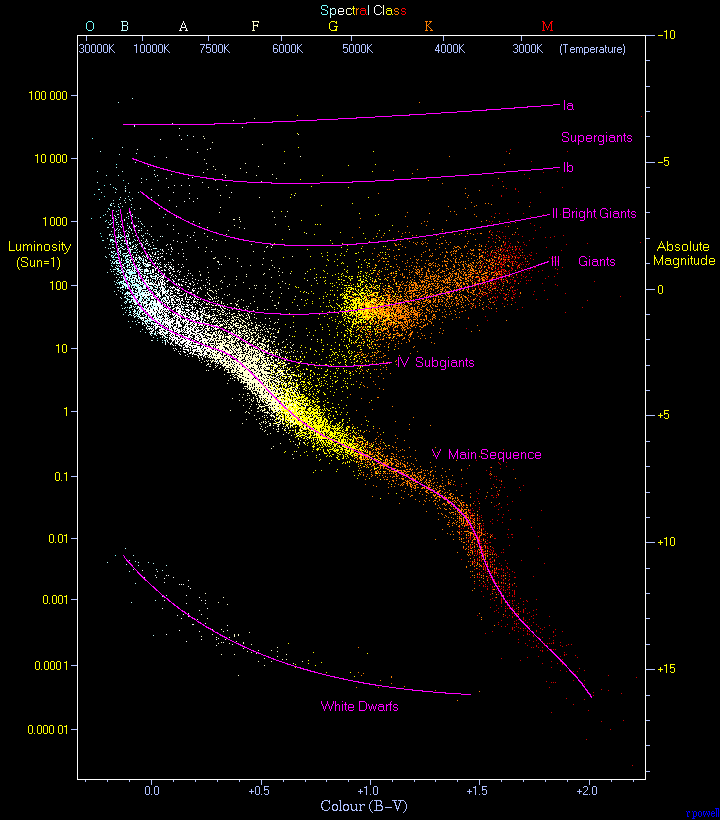

### Data Collection and Preparation techniques:
The dataset is created based on several equations in astrophysics. They are given below:

- Stefan-Boltzmann's law of Black body radiation (To find the luminosity of a star)

- Wienn's Displacement law (for finding surface temperature of a star using wavelength)

- Absolute magnitude relation

- Radius of a star using parallax .

The missing data were manually calculated using those equations of astrophysics given above.

# QUESTION STATEMENT

To analyse the given star type dataset and build an accurate model to predict star type based on inputs given.

### Importing libraries and dataset



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/StarType.csv')
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


# DATA PREPROCESSING

This process is essential because raw data is often incomplete, inconsistent, or contains errors, which can adversely affect the results of an analysis or machine learning model. The goal of data preprocessing is to ensure that the data is of high quality, reliable, and suitable for the specific analytical techniques or models being applied, thereby improving the accuracy and performance of subsequent analyses or predictions.

To perform:

- Data Cleaning
- Encoding
- Exploratory Data Analysis

Univariate, Bivariate, and Multivariate analysis is done via Visualization.


In [ ]:
df.shape

(240, 7)

In [ ]:
df.dtypes

,0
Temperature (K),int64
Luminosity(L/Lo),float64
Radius(R/Ro),float64
Absolute magnitude(Mv),float64
Star type,int64
Star color,object
Spectral Class,object


In [ ]:
df.count()

,0
Temperature (K),240
Luminosity(L/Lo),240
Radius(R/Ro),240
Absolute magnitude(Mv),240
Star type,240
Star color,240
Spectral Class,240


In [ ]:
df.isnull().sum()

,0
Temperature (K),0
Luminosity(L/Lo),0
Radius(R/Ro),0
Absolute magnitude(Mv),0
Star type,0
Star color,0
Spectral Class,0


In [ ]:
df.keys().tolist()

['Temperature (K)',
 'Luminosity(L/Lo)',
 'Radius(R/Ro)',
 'Absolute magnitude(Mv)',
 'Star type',
 'Star color',
 'Spectral Class']

In [ ]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
df["Star color"] = df["Star color"].str.lower().str.replace(" ", "").str.replace("-", "")
df["Star color"] = df["Star color"].str.replace("yellowishwhite", "yellowwhite").str.replace("whiteyellow", "yellowwhite")
df["Star color"] = df["Star color"].str.replace("whitish", "white").str.replace("paleyelloworange","orange")
df["Star color"] = df["Star color"].str.replace("yellowish", "yellow").str.replace("orangered","orange")
df["Star color"].value_counts()

,count
Star color,
red,112
blue,56
bluewhite,41
white,12
yellowwhite,12
orange,4
yellow,3


In [ ]:
df['Star type'] = df['Star type'].map({0: 'Brown Dwarf', 1: 'Red Dwarf', 2: 'White Dwarf', 3: 'Main Sequence', 4: 'Super Giant', 5: 'Hyper Giant'})

In [ ]:
dfo = df

In [ ]:
df['Star type'].unique()

array(['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence',
       'Super Giant', 'Hyper Giant'], dtype=object)

In [ ]:
df['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

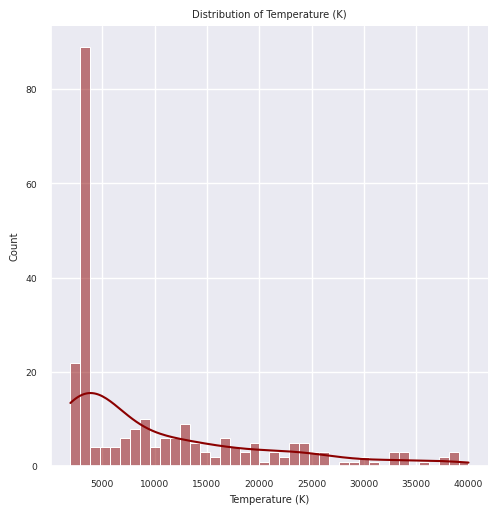

In [ ]:
sns.displot(df['Temperature (K)'].dropna(),kde=True,color='darkred',bins=40)
plt.title('Distribution of Temperature (K)')
plt.show()

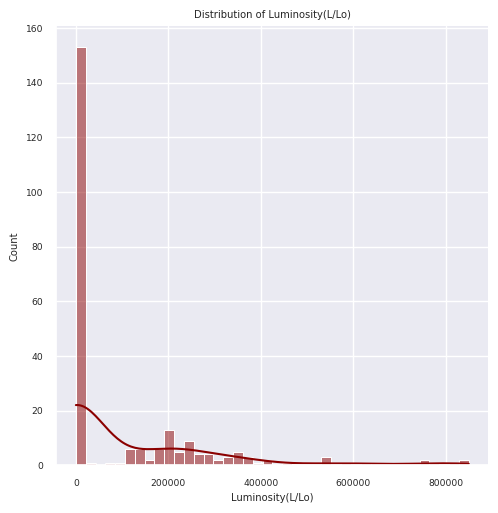

In [ ]:
sns.displot(df['Luminosity(L/Lo)'].dropna(),kde=True,color='darkred',bins=40)
plt.title('Distribution of Luminosity(L/Lo)')
plt.show()

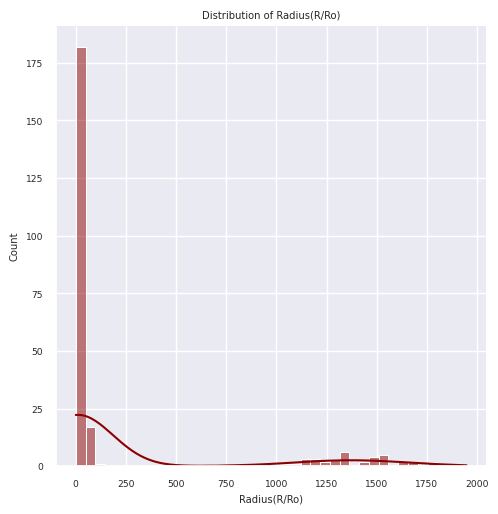

In [ ]:
sns.displot(df['Radius(R/Ro)'].dropna(),kde=True,color='darkred',bins=40)
plt.title('Distribution of Radius(R/Ro)')
plt.show()

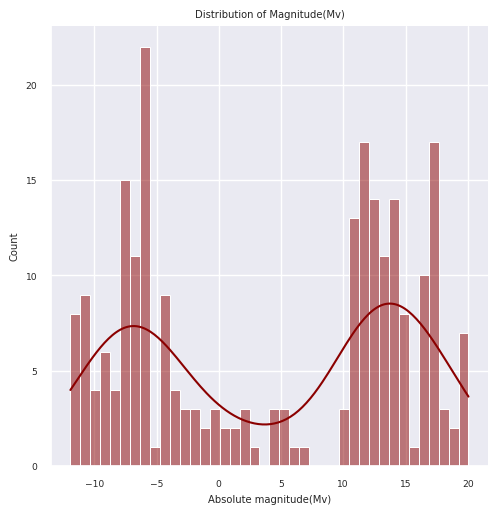

In [ ]:
sns.displot(df['Absolute magnitude(Mv)'].dropna(),kde=True,color='darkred',bins=40)
plt.title('Distribution of Magnitude(Mv)')
plt.show()

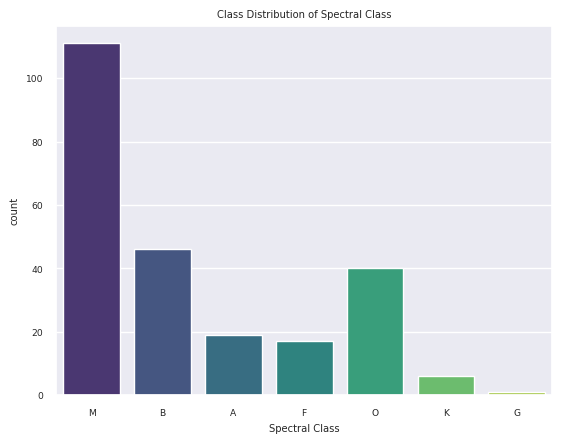

In [ ]:
sns.countplot(x='Spectral Class', data=df, palette='viridis', hue='Spectral Class')
plt.title('Class Distribution of Spectral Class')
plt.show()

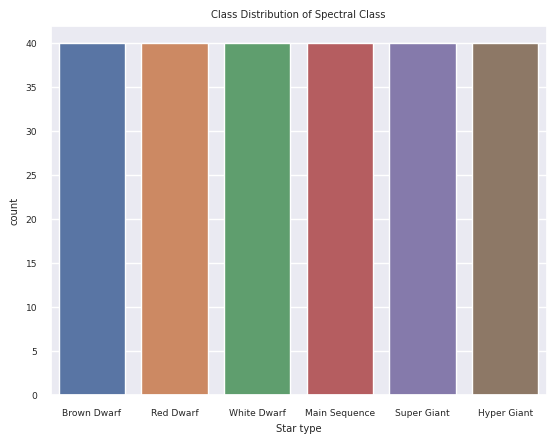

In [ ]:
sns.countplot(x='Star type', data=df, hue='Star type')
plt.title('Class Distribution of Spectral Class')
plt.show()

In [ ]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,red,M


In [ ]:
pip install category_encoders

In [ ]:
# since StarType and SpectralClass belong to ordinal data, we are using ordinal encoding
df['Star type'] = df['Star type'].map({'Brown Dwarf': 0, 'Red Dwarf': 1, 'White Dwarf': 2, 'Main Sequence': 3, 'Super Giant': 4, 'Hyper Giant': 5})
df['Spectral Class'] = df['Spectral Class'].map({'M': 0, 'K': 1, 'G': 2, 'F': 3, 'A': 4, 'B': 5, 'O': 6})

# since StarColor is nominal data, we are using One Hot Encoding
from category_encoders.one_hot import OneHotEncoder
one_hot = OneHotEncoder(cols=['Star color'])
df = one_hot.fit_transform(df)
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_1,Star color_2,Star color_3,Star color_4,Star color_5,Star color_6,Star color_7,Spectral Class
0,3068,0.002400,0.1700,16.12,0,1,0,0,0,0,0,0,0
1,3042,0.000500,0.1542,16.60,0,1,0,0,0,0,0,0,0
2,2600,0.000300,0.1020,18.70,0,1,0,0,0,0,0,0,0
3,2800,0.000200,0.1600,16.65,0,1,0,0,0,0,0,0,0
4,1939,0.000138,0.1030,20.06,0,1,0,0,0,0,0,0,0


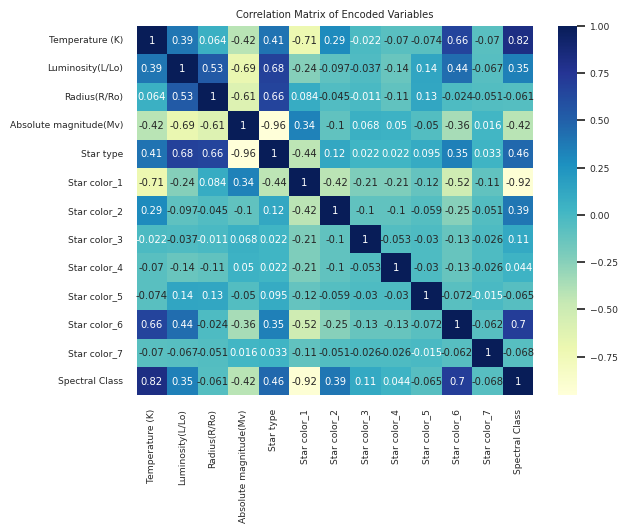

In [ ]:
sns.set(font_scale=0.6)
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix of Encoded Variables')
plt.show()

We can make following assumptions based on the above correlation matrix:
1. We want all the variables to affect model's target prediction. Hence all the correlations between Spectral class and feature variables must be included.
2. Correlation of Star color_1 (negative maximum) and Star color_6 (positive maximum) are due to the number of data points in that color and does not imply actual correlation due to feature property.

Other important correlations include:

- Luminosity - Star Type (0.68)
- Radius - Star Type (0.66)
- Luminosity - Radius (0.53)
- Radius - Absolute Magnitude (-0.61)
- Luminosity - Absolute Magnitude (-0.69)
- Star Type - Absolute Magnitude (-0.96)

In [ ]:
dfo.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,red,0
1,3042,0.000500,0.1542,16.60,0,red,0
2,2600,0.000300,0.1020,18.70,0,red,0
3,2800,0.000200,0.1600,16.65,0,red,0
4,1939,0.000138,0.1030,20.06,0,red,0


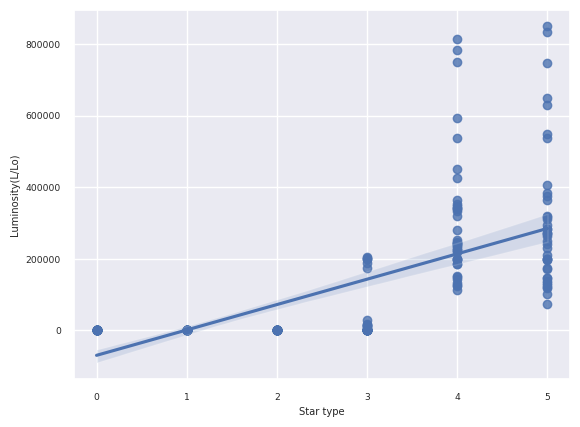

In [ ]:
sns.regplot(x='Star type', y='Luminosity(L/Lo)', data= dfo)
plt.show()

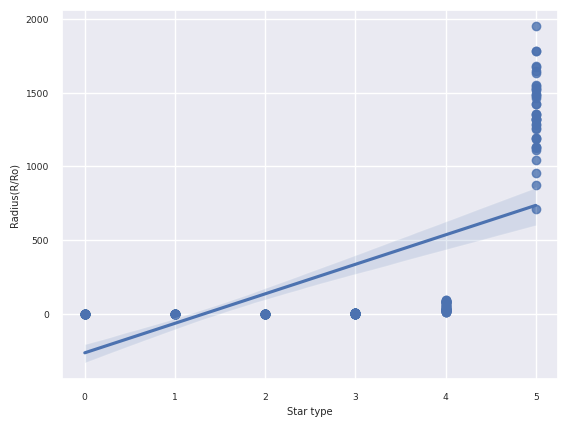

In [ ]:
sns.regplot(x='Star type', y='Radius(R/Ro)', data= dfo)
plt.show()

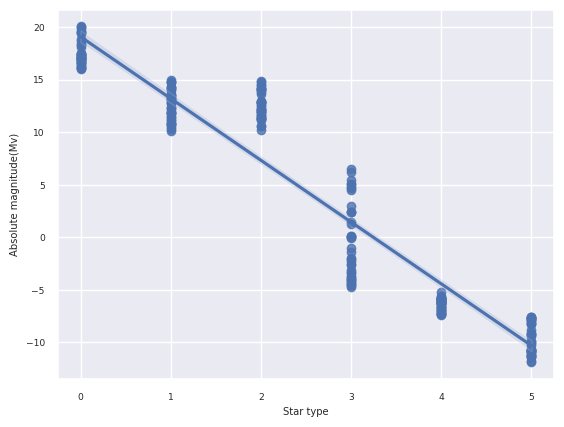

In [ ]:
sns.regplot(x='Star type', y='Absolute magnitude(Mv)', data= dfo)
plt.show()

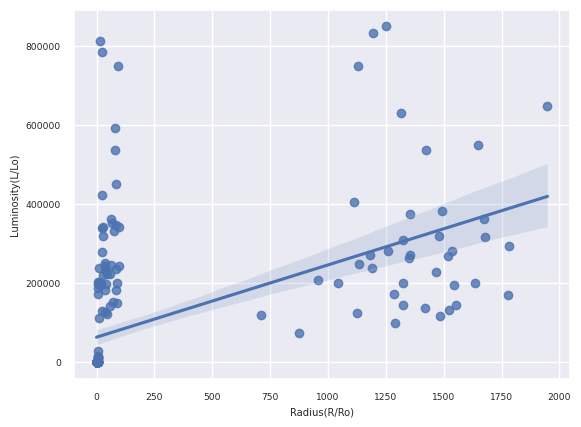

In [ ]:
sns.regplot(x='Radius(R/Ro)', y='Luminosity(L/Lo)', data= dfo)
plt.show()

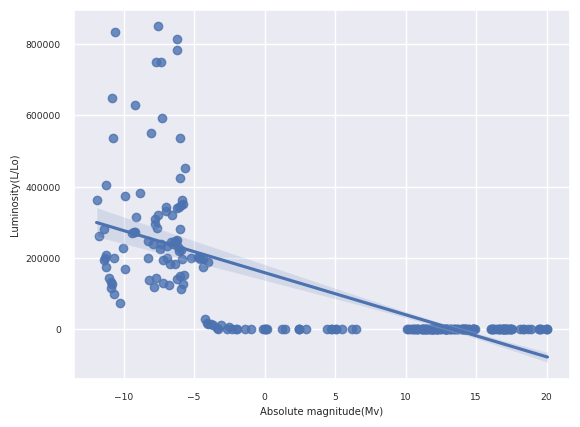

In [ ]:
sns.regplot(x='Absolute magnitude(Mv)', y='Luminosity(L/Lo)', data= dfo)
plt.show()

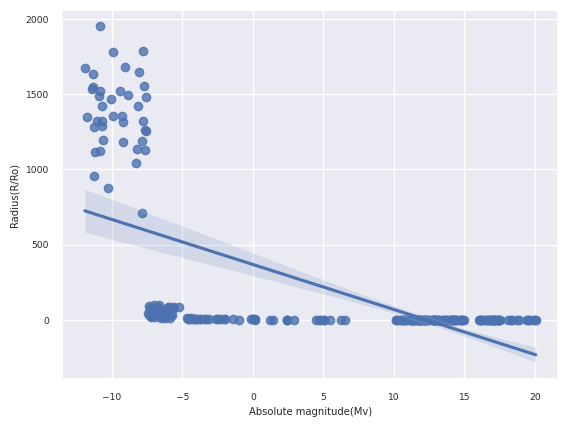

In [ ]:
sns.regplot(x='Absolute magnitude(Mv)', y='Radius(R/Ro)', data= dfo)
plt.show()

# FEATURE TRANSFORMATION AND SELECTION

Feature engineering is a critical step in the machine learning pipeline because the quality and relevance of features directly impact the effectiveness of the models. Key aspects of feature engineering include:

- Feature Creation: Developing new features from existing data that can provide additional information to the model. This might include combining multiple features (e.g., creating a ratio or difference), extracting useful information from date and time fields (e.g., day of the week, month), or applying domain-specific knowledge to generate meaningful features.
- Feature Transformation: Modifying features to better suit the model’s requirements. This can involve normalizing or scaling numerical features to ensure all features have a similar range, which is particularly important for models that are sensitive to feature scale, such as neural networks or algorithms using distance metrics like k-nearest neighbors.
- Handling Missing Values: Dealing with missing data in a way that minimizes bias and maintains data integrity. This might involve imputing missing values with mean, median, or mode, or using more sophisticated techniques like k-nearest neighbors imputation or model-based imputation.
- Encoding Categorical Variables: Converting categorical data into numerical format since most machine learning algorithms work with numerical data. Common techniques include one-hot encoding, label encoding, or binary encoding.
- Feature Selection: Identifying and retaining the most relevant features for the model. This helps reduce the dimensionality of the dataset, improve model performance, and prevent overfitting. Techniques for feature selection include recursive feature elimination, LASSO (Least Absolute Shrinkage and Selection Operator), and tree-based methods.

### Feature transformation

In this dataset, it is evident that certain classes, such as 'M', have significantly more instances compared to others. This imbalance is crucial to recognize as it can impact the performance of machine learning models, potentially leading to biased predictions favoring the majority class.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
dfo['Temperature (K)'] = np.log(dfo['Temperature (K)'])
dfo['Luminosity(L/Lo)'] = np.log(dfo['Luminosity(L/Lo)'])
dfo['Radius(R/Ro)'] = np.log(dfo['Radius(R/Ro)'])
scaler = MinMaxScaler()
dfo['Temperature (K)'] = scaler.fit_transform(np.expand_dims(dfo['Temperature (K)'], axis=1))
dfo['Luminosity(L/Lo)'] = scaler.fit_transform(np.expand_dims(dfo['Luminosity(L/Lo)'], axis=1))
dfo['Radius(R/Ro)'] = scaler.fit_transform(np.expand_dims(dfo['Radius(R/Ro)'], axis=1))
dfo['Absolute magnitude(Mv)'] = scaler.fit_transform(np.expand_dims(dfo['Absolute magnitude(Mv)'], axis=1))

In [ ]:
dfo.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,0.151602,0.147329,0.243442,0.876798,0,red,0
1,0.148790,0.079381,0.235546,0.891807,0,red,0
2,0.096917,0.057254,0.202094,0.957473,0,red,0
3,0.121402,0.039691,0.238535,0.893371,0,red,0
4,0.000000,0.023617,0.202884,1.000000,0,red,0


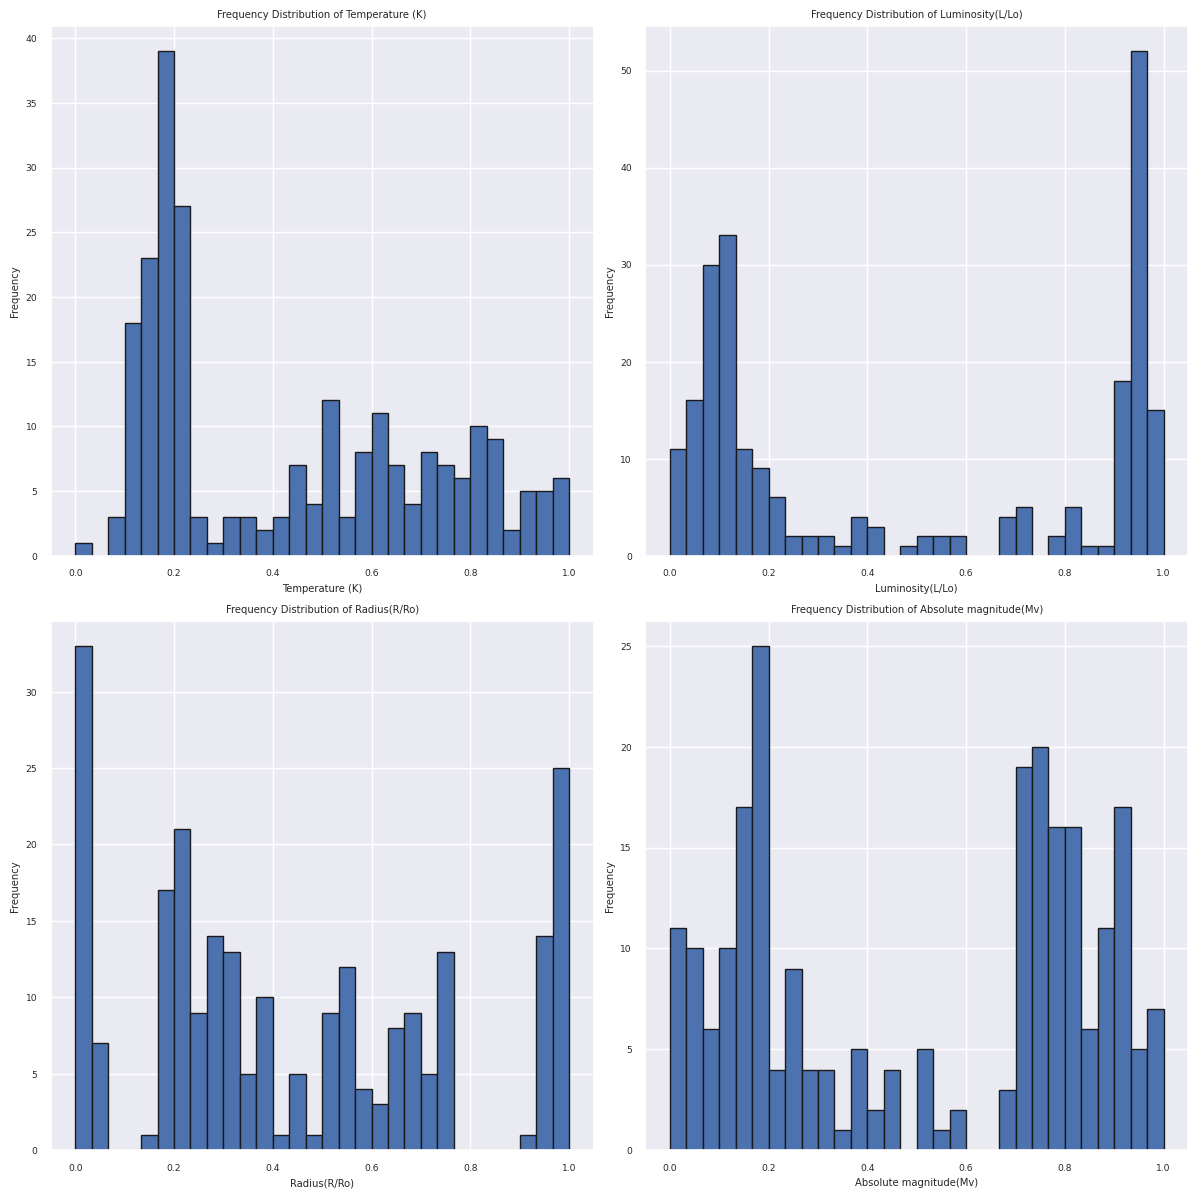

In [ ]:
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
n_features = len(features)
n_rows = (n_features + 1) // 2
n_cols = 2
plt.figure(figsize=(12, 6 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(dfo[feature], bins=30, edgecolor='k')
    plt.title(f'Frequency Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
#Making a final training ready model with encoded categorical values form df and transformed numerical data from dfo
df1= df.drop(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'], axis=1)
df2= dfo.drop(['Star type', 'Star color', 'Spectral Class'], axis=1)
df_final = pd.concat([df2, df1], axis=1)
df_final.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_1,Star color_2,Star color_3,Star color_4,Star color_5,Star color_6,Star color_7,Spectral Class
0,0.151602,0.147329,0.243442,0.876798,0,1,0,0,0,0,0,0,0
1,0.148790,0.079381,0.235546,0.891807,0,1,0,0,0,0,0,0,0
2,0.096917,0.057254,0.202094,0.957473,0,1,0,0,0,0,0,0,0
3,0.121402,0.039691,0.238535,0.893371,0,1,0,0,0,0,0,0,0
4,0.000000,0.023617,0.202884,1.000000,0,1,0,0,0,0,0,0,0


### Feature selection
We can use multiple methods for filtering the features which are appropriate for selection. They are -
- Chi-Square Test: It is calculated by comparing the observed frequencies of each category to the expected frequencies that would be expected if there were no association between the two variables. The larger the difference between the observed and expected frequencies, the larger the chi-square value.
- Extra Trees Classifier: It is an ensemble learning method that leverages decision trees. It's closely related to Random Forests but offers a simpler and often faster approach.
- Correlation: A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. It's a powerful tool for summarizing a large dataset and finding patterns in the data.

Using Chi-Square Test for filtering:

In [ ]:
X=df_final.drop(labels=['Spectral Class'], axis=1)
y=df_final['Spectral Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.feature_selection import chi2
f_p_values= chi2(X_train, y_train)
p_values = pd.Series(f_p_values[1])
p_values.index= X_train.columns
p_values.sort_index(ascending=True)

#Observation: Least p_values from chi square results are most important

,0
Absolute magnitude(Mv),6.373366e-02
Luminosity(L/Lo),1.249834e-03
Radius(R/Ro),1.481072e-01
Star color_1,8.200640e-19
Star color_2,2.261294e-18
Star color_3,2.093119e-11
Star color_4,1.183124e-24
Star color_5,2.347237e-09
Star color_6,5.447515e-22
Star color_7,1.024133e-14


Using Extra Trees Classifier for filtering:

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

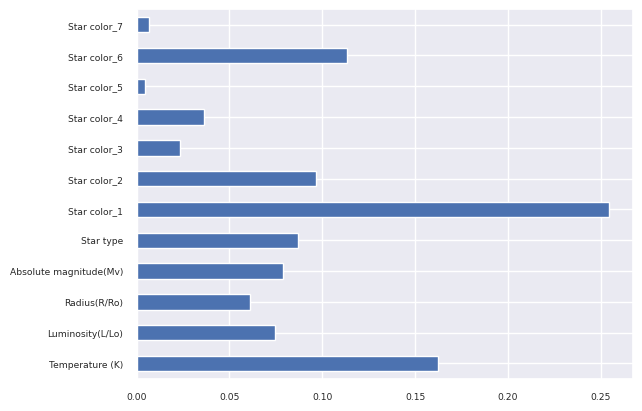

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.plot(kind='barh')
plt.show()

Using Correlation for filtering:

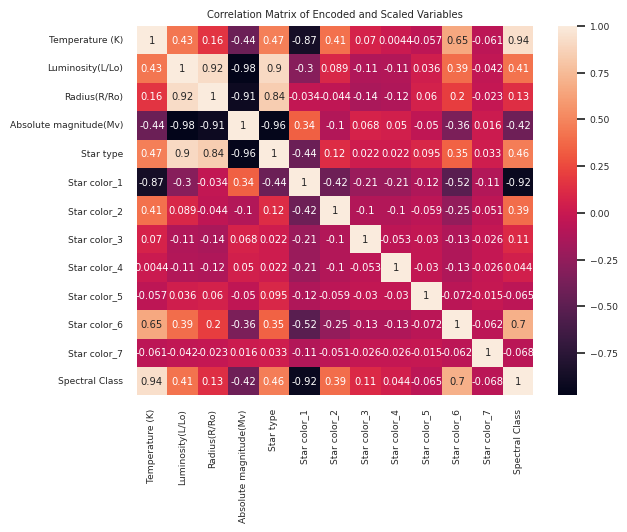

In [ ]:
sns.set(font_scale=0.6)
sns.heatmap(df_final.corr(), annot=True)
plt.title('Correlation Matrix of Encoded and Scaled Variables')
plt.show()

Based on the above results, all the parameters can be considered significant, and hence will be in included in the model.

# MODELING

Machine learning models may be supervised (which learns from a given test set to predict values for untested data) and unsupervised (which learns from patterns in the existing data excluding the labeled output data so that new data may be categorized into the already existing set of patterns). Supervised learning can be categorized into Regression(a target value may be predicted using relations between dependant and independent variables) and Classification (the output is a discrete value or a category, and a given data set may be used to predict in what category such data may lie in) In this study we intend to predict Spectral Class (Target) which has discrete values and hence we will be using Classification techniques.

Decision trees are a versatile machine learning algorithm used for both classification and regression tasks. They function like a flowchart, starting with a root node representing the entire dataset. Internal nodes split the data based on specific feature values, while branches represent the possible outcomes of these splits. Leaf nodes, the endpoints of the tree, represent the final predictions or classifications.

Using Decision Trees:



Accuracy:  0.8055555555555556
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.50      0.67      0.57         3
           2       0.00      0.00      0.00         1
           3       0.75      0.67      0.71         9
           4       0.50      0.50      0.50         6
           5       0.67      0.75      0.71         8
           6       0.71      0.71      0.71        14

    accuracy                           0.81        72
   macro avg       0.59      0.61      0.60        72
weighted avg       0.80      0.81      0.80        72



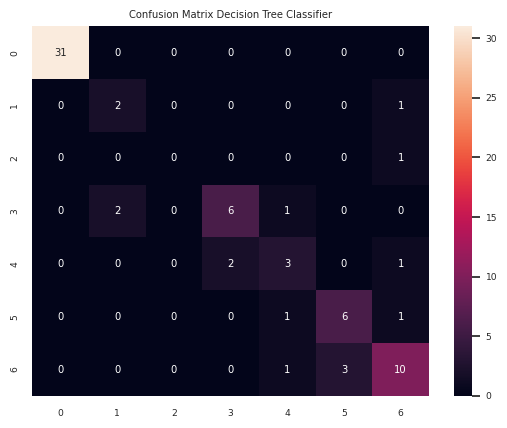

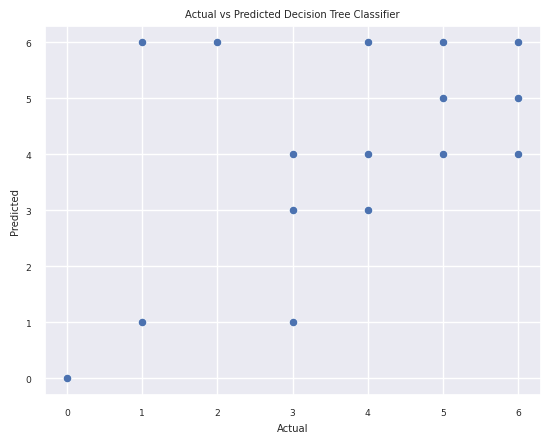

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
clf=DecisionTreeClassifier(random_state=1)
clf=clf.fit(X_train,y_train)
y_pred_DTC=clf.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred_DTC))
print('Classification report: \n', classification_report(y_test, y_pred_DTC, zero_division = 0))
cm=np.array(confusion_matrix(y_test,y_pred_DTC))
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix Decision Tree Classifier')
plt.show()
sns.scatterplot(x=y_test,y=y_pred_DTC)
plt.title('Actual vs Predicted Decision Tree Classifier')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

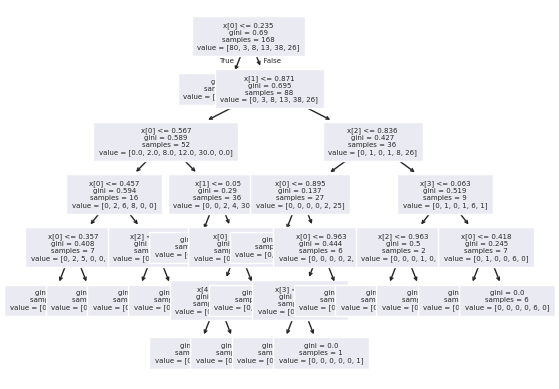

<Figure size 4000x10000 with 0 Axes>

In [ ]:
from sklearn.tree import plot_tree
plot_tree(clf, fontsize=5)
plt.figure('Decision Tree', figsize=[40,100])
plt.show()

Support Vector Machines (SVMs) are powerful supervised learning algorithms used for classification and regression tasks. They aim to find the optimal hyperplane that separates data points into different classes with the largest possible margin. The points closest to the hyperplane, known as support vectors, play a crucial role in defining the decision boundary.

Using Support Vector Machines:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
sv_model = SVC(kernel="linear", C=1.0)
sv_model.fit(X, y)

SVC(kernel='linear')

Accuracy:  0.9041666666666667
Classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         1
           3       1.00      0.89      0.94         9
           4       0.60      0.50      0.55         6
           5       0.70      0.88      0.78         8
           6       1.00      1.00      1.00        14

    accuracy                           0.90        72
   macro avg       0.75      0.70      0.72        72
weighted avg       0.89      0.90      0.89        72



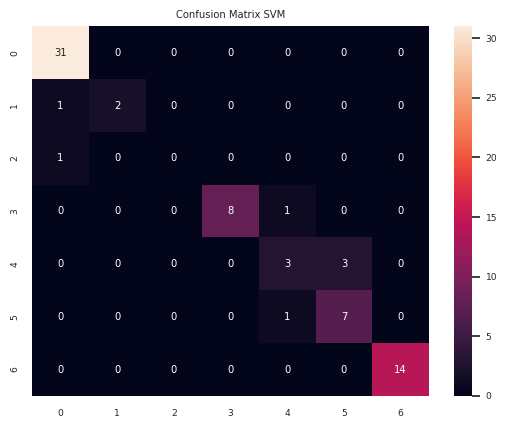

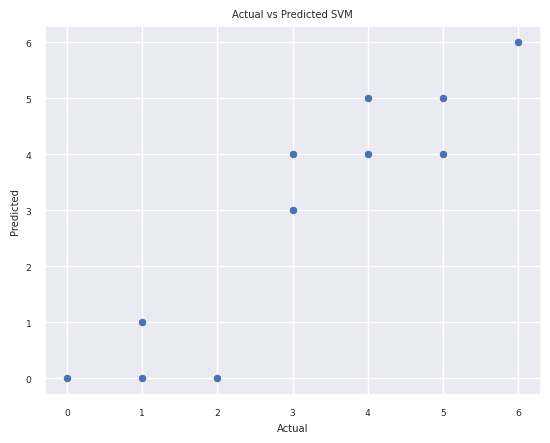

In [ ]:
expected=y_test
predicted=sv_model.predict(X_test)
from sklearn import metrics
print('Accuracy: ',sv_model.score(X, y))
print('Classification report: \n', classification_report(expected, predicted, zero_division=0))
cm2=np.array(metrics.confusion_matrix(expected,predicted))
sns.heatmap(cm2,annot=True)
plt.title('Confusion Matrix SVM')
plt.show()
sns.scatterplot(x=expected,y=predicted)
plt.title('Actual vs Predicted SVM')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Random Forest is a powerful ensemble learning technique that combines multiple decision trees to make accurate predictions. It works by creating a "forest" of decision trees, each trained on a random subset of the data and features. This randomness helps reduce overfitting and improves the model's generalization performance.

Using Random Forest Classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred_RF=rfc.predict(X_test)
report = classification_report(y_test, y_pred_RF, output_dict=True, zero_division=0)

Accuracy:  0.9166666666666666
Classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         1
           3       0.90      1.00      0.95         9
           4       0.83      0.83      0.83         6
           5       0.78      0.88      0.82         8
           6       1.00      0.86      0.92        14

    accuracy                           0.92        72
   macro avg       0.78      0.75      0.76        72
weighted avg       0.91      0.92      0.91        72



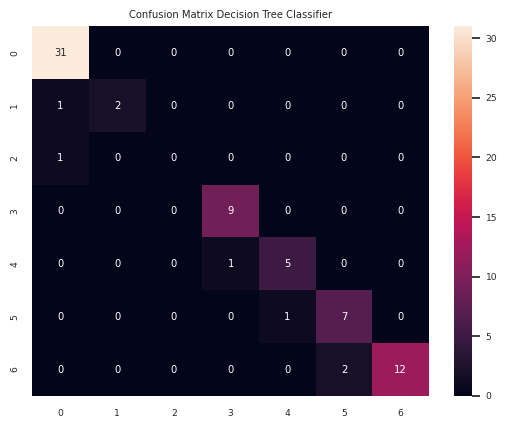

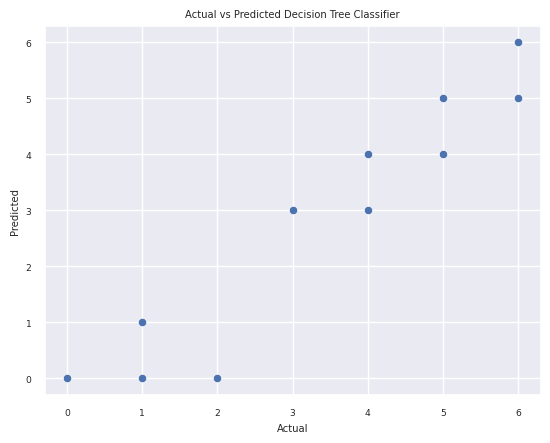

In [ ]:
print('Accuracy: ',report['accuracy'])
print('Classification report: \n', classification_report(y_test, y_pred_RF, zero_division=0))
cm=np.array(confusion_matrix(y_test,y_pred_RF))
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix Decision Tree Classifier')
plt.show()
sns.scatterplot(x=y_test,y=y_pred_RF)
plt.title('Actual vs Predicted Decision Tree Classifier')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Here we can observe, that Random Forest Classifier gives most accurate prediction. However, with a larger initial data set, it will be possible to achieve greater accuracy. Another way of increasing accuracy is to perform analysis on gini scores, entropy, etc. of the above used classifiers. Then running the most optimum parameters of each of the classifiers may lead to different, yet more accurate results.

# MODEL USED AS AN APPLICATION TO PREDICT SPECTRAL CLASS OF STAR
All inputs have to be taken from user. Categorical inputs should be converted internally into encoded values for Model to give accurate and error-less prediction.

In [ ]:
T=int(input('Enter Temperature in Kelvin: '))
L=float(input('Enter Luminosity: '))
R=float(input('Enter Radius: '))
Mv=float(input('Enter Absolute Magnitude: '))
print('Star type options: ')
print('0 -> Brown Dwarf')
print('1 -> Red Dwarf')
print('2 -> White Dwarf')
print('3 -> Main Sequence')
print('4 -> Super Giant')
print('5 -> Hyper Giant')
st=int(input('Enter Star Type: '))
print('Star Color options: ')
print('red, blue, white, orange, yellow, yellowwhite, bluewhite')
sc=str(input('Enter Star Color: '))
arr_sc=[0,0,0,0,0,0,0]
def StarColor(sc):
  if sc=='red':
    arr_sc[0]=1
  elif sc=='blue':
    arr_sc[1]=1
  elif sc=='bluewhite':
    arr_sc[2]=1
  elif sc=='white':
    arr_sc[3]=1
  elif sc=='yellowwhite':
    arr_sc[4]=1
  elif sc=='orange':
    arr_sc[5]=1
  elif sc=='yellow':
    arr_sc[6]=1
  return arr_sc

arr1=[T,L,R,Mv,st]
arr_check=np.concatenate((arr1,arr_sc))
x_check=[arr_check]

y_result= rfc.predict(x_check)
def result(y_result):
  if y_result==0:
    print('Predicted Spectral Class: M')
  elif y_result==1:
    print('Predicted Spectral Class: K')
  elif y_result==2:
    print('Predicted Spectral Class: G')
  elif y_result==3:
    print('Predicted Spectral Class: F')
  elif y_result==4:
    print('Predicted Spectral Class: A')
  elif y_result==5:
    print('Predicted Spectral Class: B')
  elif y_result==6:
    print('Predicted Spectral Class: O')
  return;
result(y_result)

Enter Temperature in Kelvin: 3070
Enter Luminosity: 0.025
Enter Radius: 0.16
Enter Absolute Magnitude: 16
Star type options: 
0 -> Brown Dwarf
1 -> Red Dwarf
2 -> White Dwarf
3 -> Main Sequence
4 -> Super Giant
5 -> Hyper Giant
Enter Star Type: 0
Star Color options: 
red, blue, white, orange, yellow, yellowwhite, bluewhite
Enter Star Color: red
Predicted Spectral Class: M


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
